In [155]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import pingouin as pg

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import paths, plotting, labels,data
from adjustText import adjust_text

!date -I

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-05-16


In [156]:
fig_dir = f"pytepfit_ftract_comparison_results/"
%mkdir -p  {paths.path_figures(fig_dir)}

In [157]:
FTRACT_SELECTED_ROI = "3b" # "1"

In [158]:
df_dice_schaefer = pd.read_csv( 
    data.path('interim/DICE/DICE_Glasser_Schaefer200_res-1x1x1.csv'),
    index_col=0
)

df_dice_schaefer

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_PFCdPFCm_1,7Networks_RH_Default_PFCdPFCm_2,7Networks_RH_Default_PFCdPFCm_3,7Networks_RH_Default_PFCdPFCm_4,7Networks_RH_Default_PFCdPFCm_5,7Networks_RH_Default_PFCdPFCm_6,7Networks_RH_Default_PFCdPFCm_7,7Networks_RH_Default_pCunPCC_1,7Networks_RH_Default_pCunPCC_2,7Networks_RH_Default_pCunPCC_3
regionName,,,,,,,,,,,,,,,,,,,,,
V1_L,0.001433,0.001989,0.000000,0.042971,0.112614,0.000000,0.279401,0.0,0.032078,0.290259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
V6_L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
V2_L,0.022989,0.121945,0.000000,0.144727,0.064140,0.011392,0.031769,0.0,0.070741,0.064629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000573,0.0,0.0
V3_L,0.047550,0.144718,0.000000,0.008050,0.049874,0.000000,0.000000,0.0,0.081991,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
V4_L,0.032567,0.177670,0.002828,0.000000,0.072781,0.000000,0.000000,0.0,0.067541,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOP2_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PoI1_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ig_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
dice_schaefer_array = df_dice_schaefer.to_numpy()
n_glasser,n_schaefer = dice_schaefer_array.shape
dice_schaefer_array[n_glasser//2:]=dice_schaefer_array[:n_glasser//2]
dice_schaefer_array[n_glasser//2:,:n_schaefer//2] = np.nan
dice_schaefer_array[:n_glasser//2,n_schaefer//2:] = np.nan
dice_schaefer_array

array([[0.00143277, 0.00198858, 0.        , ...,        nan,        nan,
               nan],
       [0.        , 0.        , 0.        , ...,        nan,        nan,
               nan],
       [0.02298851, 0.12194461, 0.        , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]])

In [160]:
df_dice_schaefer =  pd.DataFrame(data=dice_schaefer_array,   
                                index=df_dice_schaefer.index, 
                                columns=df_dice_schaefer.columns) 
df_dice_schaefer

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_PFCdPFCm_1,7Networks_RH_Default_PFCdPFCm_2,7Networks_RH_Default_PFCdPFCm_3,7Networks_RH_Default_PFCdPFCm_4,7Networks_RH_Default_PFCdPFCm_5,7Networks_RH_Default_PFCdPFCm_6,7Networks_RH_Default_PFCdPFCm_7,7Networks_RH_Default_pCunPCC_1,7Networks_RH_Default_pCunPCC_2,7Networks_RH_Default_pCunPCC_3
regionName,,,,,,,,,,,,,,,,,,,,,
V1_L,0.001433,0.001989,0.000000,0.042971,0.112614,0.000000,0.279401,0.0,0.032078,0.290259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6_L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2_L,0.022989,0.121945,0.000000,0.144727,0.064140,0.011392,0.031769,0.0,0.070741,0.064629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3_L,0.047550,0.144718,0.000000,0.008050,0.049874,0.000000,0.000000,0.0,0.081991,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4_L,0.032567,0.177670,0.002828,0.000000,0.072781,0.000000,0.000000,0.0,0.067541,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FOP2_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PoI1_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ig_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
len(list(df_dice_schaefer.index))

360

<Axes: ylabel='regionName'>

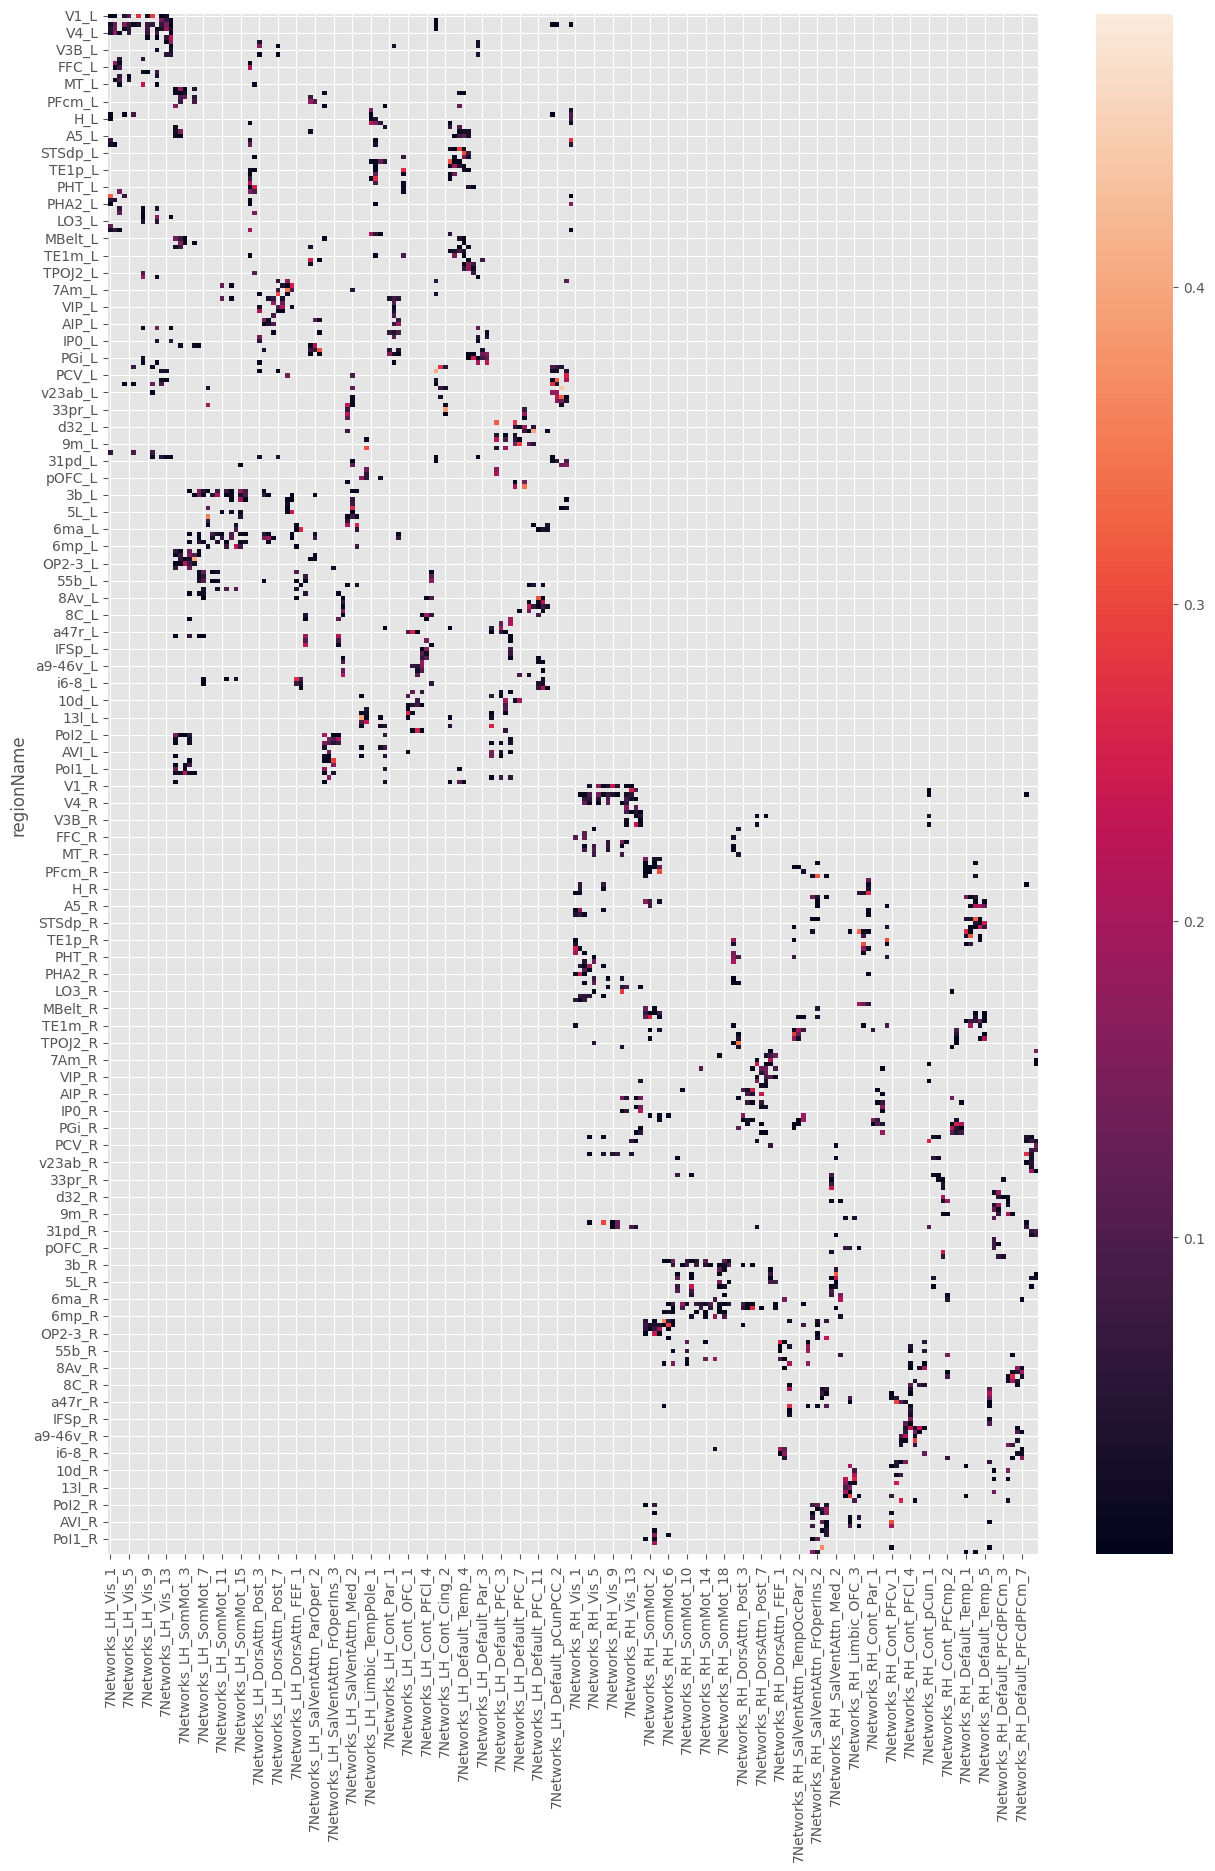

In [162]:
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(df_dice_schaefer, mask=df_dice_schaefer == 0.0, ax=ax)

In [163]:
ftract_probabilities = pd.read_csv(paths.path(f'interim/L_{FTRACT_SELECTED_ROI}_response_probability_and_communication_metrics_M1_FTRACT_ED0_long.csv')).set_index('label')
def reorder_label(x):
    if x[0] == 'L':
        return x[2:]+"_L"
    else:
        return x[2:]+"_R"

ftract_probabilities.index = ftract_probabilities.index.map(reorder_label)
ftract_probabilities

,response,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF
label,,,,,,,,,,,
V1_L,NaN,86.130607,0.0,inf,0.009180,0.004199,0.000142,inf,18.968501,0.005998,0.002778
V6_L,NaN,66.905377,0.0,inf,0.009451,0.005002,0.000193,inf,14.131162,0.008234,0.001962
V2_L,NaN,81.759962,0.0,inf,0.009236,0.004157,0.000104,inf,18.859902,0.006358,0.002463
V3_L,NaN,81.100872,0.0,inf,0.008173,0.004355,0.000131,inf,14.547486,0.007004,0.002766
V4_L,NaN,82.487126,0.0,inf,0.008430,0.004579,0.000099,inf,21.530236,0.007316,0.002854
...,...,...,...,...,...,...,...,...,...,...,...
FOP2_R,NaN,90.352537,0.0,inf,0.007381,0.005861,0.000228,inf,22.657491,0.006939,0.001658
PoI1_R,NaN,95.853057,0.0,inf,0.007615,0.004942,0.000635,inf,15.317664,0.006197,0.002664
Ig_R,NaN,83.897695,0.0,inf,0.007489,0.005057,0.000240,inf,21.995380,0.006711,0.001151


In [164]:
pytepfit_AUC = pd.read_csv(paths.path('interim/pyTepFit_empirical/not_over_threshold_nan/response_AUC_and_communication_metrics_M1_pyTepFit_200ms_thr7.csv')).set_index('label')
pytepfit_AUC.index = pytepfit_AUC.index.map(lambda x: x[:-3])
mapping_schaefer_schaefer = pd.read_csv(paths.path(f'interim/schaefer_parcellation_mappings/ROI_MAPPING_pytepfit.csv'),index_col=0)
pytepfit_AUC = pd.merge(pytepfit_AUC,mapping_schaefer_schaefer,left_on="label",right_on='roi_name')
pytepfit_AUC[["response","ED","roi_name","roi_name_csv"]]

,response,ED,roi_name,roi_name_csv
0,NaN,45.307805,7Networks_LH_Cont_Cing_1,7Networks_LH_Cont_Cing_1
1,3429.233902,56.289608,7Networks_LH_Cont_Cing_2,7Networks_LH_Cont_Cing_2
2,899.571678,92.766248,7Networks_LH_Cont_PFCl_1,7Networks_LH_Cont_OFC_1
3,795.702728,94.172221,7Networks_LH_Cont_PFCl_2,7Networks_LH_Cont_PFCl_1
4,NaN,92.564602,7Networks_LH_Cont_PFCl_3,7Networks_LH_Cont_PFCl_2
...,...,...,...,...
195,NaN,115.547602,7Networks_RH_Vis_5,7Networks_RH_Vis_5
196,NaN,105.548873,7Networks_RH_Vis_6,7Networks_RH_Vis_6
197,NaN,90.633878,7Networks_RH_Vis_7,7Networks_RH_Vis_7
198,NaN,114.749213,7Networks_RH_Vis_8,7Networks_RH_Vis_8


In [165]:
pytepfit_AUC_response =pytepfit_AUC.set_index("roi_name_csv")["response"]
pytepfit_AUC_response

roi_name_csv
7Networks_LH_Cont_Cing_1            NaN
7Networks_LH_Cont_Cing_2    3429.233902
7Networks_LH_Cont_OFC_1      899.571678
7Networks_LH_Cont_PFCl_1     795.702728
7Networks_LH_Cont_PFCl_2            NaN
                               ...     
7Networks_RH_Vis_5                  NaN
7Networks_RH_Vis_6                  NaN
7Networks_RH_Vis_7                  NaN
7Networks_RH_Vis_8                  NaN
7Networks_RH_Vis_9                  NaN
Name: response, Length: 200, dtype: float64

In [166]:
new_score = []
new_score_label = []

for i,row in df_dice_schaefer.iterrows():
    new_score_label.append(row.name)
    c = pd.concat([pytepfit_AUC_response,row.rename("dice")],axis=1)
    row_sum = row.sum()
    c["multiply"] = c.apply(lambda r: r["response"]*r["dice"]/row_sum,axis=1)
    new_score.append(c["multiply"].sum())

new_scores_df = pd.DataFrame(data={"response_AUC":new_score,"label":new_score_label})
new_scores_df 

,response_AUC,label
0,78.272671,V1_L
1,683.555752,V6_L
2,523.415908,V2_L
3,409.502587,V3_L
4,442.271785,V4_L
...,...,...
355,8.817571,FOP2_R
356,78.695642,PoI1_R
357,0.000000,Ig_R
358,0.000000,FOP5_R


In [167]:
ftract_probabilities_new = pd.merge(ftract_probabilities,new_scores_df, on='label')
ftract_probabilities_new

,label,response,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response_AUC
0,V1_L,NaN,86.130607,0.0,inf,0.009180,0.004199,0.000142,inf,18.968501,0.005998,0.002778,78.272671
1,V6_L,NaN,66.905377,0.0,inf,0.009451,0.005002,0.000193,inf,14.131162,0.008234,0.001962,683.555752
2,V2_L,NaN,81.759962,0.0,inf,0.009236,0.004157,0.000104,inf,18.859902,0.006358,0.002463,523.415908
3,V3_L,NaN,81.100872,0.0,inf,0.008173,0.004355,0.000131,inf,14.547486,0.007004,0.002766,409.502587
4,V4_L,NaN,82.487126,0.0,inf,0.008430,0.004579,0.000099,inf,21.530236,0.007316,0.002854,442.271785
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,FOP2_R,NaN,90.352537,0.0,inf,0.007381,0.005861,0.000228,inf,22.657491,0.006939,0.001658,8.817571
356,PoI1_R,NaN,95.853057,0.0,inf,0.007615,0.004942,0.000635,inf,15.317664,0.006197,0.002664,78.695642
357,Ig_R,NaN,83.897695,0.0,inf,0.007489,0.005057,0.000240,inf,21.995380,0.006711,0.001151,0.000000
358,FOP5_R,NaN,103.338838,0.0,inf,0.006313,0.004362,0.000048,inf,25.823303,0.005343,0.001284,0.000000


In [168]:
pg.pairwise_corr(ftract_probabilities_new,columns=["response","response_AUC"],method="spearman")

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,response,response_AUC,spearman,two-sided,78,0.242384,"[0.02, 0.44]",0.032508,0.576795


In [169]:
pg.pairwise_corr(ftract_probabilities_new,columns=["ED","response_AUC"],method="spearman")

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,ED,response_AUC,spearman,two-sided,360,-0.567156,"[-0.63, -0.49]",4.976039e-32,1.0


In [170]:
pg.pairwise_corr(ftract_probabilities_new,columns=["ED","response"],method="spearman")

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,ED,response,spearman,two-sided,78,-0.724977,"[-0.82, -0.6]",6.147253e-14,1.0


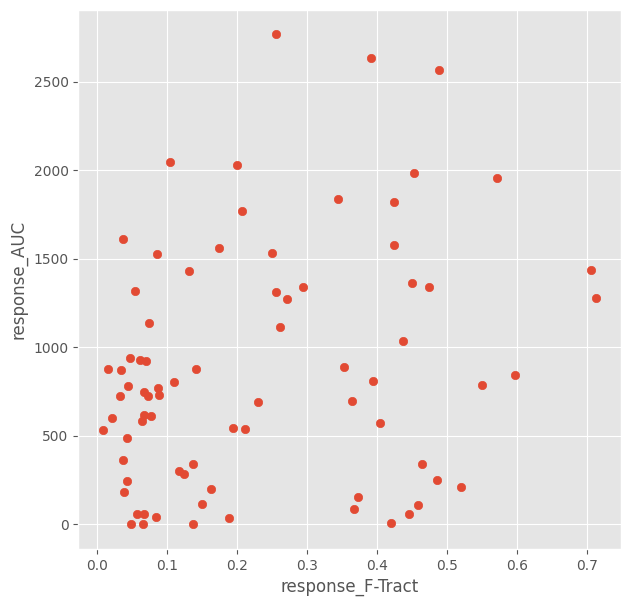

In [171]:
def plot_two_columns(df,col1,col2):
    a1 = np.array(df[col1])
    a2 = np.array(df[col2])
        
    plt.style.use('ggplot')
    fig,ax = plt.subplots(figsize=(7,7))
    
    ax.scatter(a1,a2)

    ax.set_xlabel(col1+"_F-Tract")
    ax.set_ylabel(col2)

plot_two_columns(ftract_probabilities_new,"response","response_AUC")